# Project 5 -- Arnav Surve

**TA Help:** NA
    
**Collaboration:** NA

## Question 1

In [4]:
myDF <- read.csv("/anvil/projects/tdm/data/election/escaped/itcont2020sample.txt", sep="|")
head(myDF)

,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,...,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID
,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>
1,C00401224,N,YE,,2.020013e+17,24T,IND,"SOLOMON, VICTOR",CAPE CORAL,FL,...,RETIRED,NOT EMPLOYED,7112019,15,C00042366,SA11AI_165851302,1378435,,EARMARKED FOR DSCC (C00042366),4.03022e+18
2,C00401224,N,M4,P,2.020042e+17,24T,IND,"MYERS, ELIZABETH",SCOTTSVILLE,NY,...,NOT EMPLOYED,NOT EMPLOYED,3042020,39,C00696948,SA11AI_216676150,1402724,,EARMARKED FOR BERNIE 2020 (C00696948),4.05142e+18
3,C00193433,N,YE,P,2.020012e+17,15,IND,"HASKINS, GEORGE",HARTSDALE,NY,...,NOT EMPLOYED,NOT EMPLOYED,12182019,15,,6260719,1371576,,,4.01222e+18
4,C00401224,N,YE,,2.020013e+17,24T,IND,"KOLBE, NINA",WASHINGTON,DC,...,SELF,HEALTH PROFESSIONAL,8302019,10,C00637074,SA11AI_174544101,1378435,,EARMARKED FOR FINKENAUER FOR CONGRESS (C00637074),4.03022e+18
5,C00401224,N,MY,,2.019073e+17,24T,IND,"ESSENBERG, PENNY",GRAND RAPIDS,MI,...,,,3212019,16,C00580068,SB28A_145393165,1344765,,"REFUND OF CONTRIBUTION, INITIALLY EARMARKED FOR PROGRESSIVE TURNOUT PROJECT (C00580068)",4.08282e+18
6,C00618371,N,Q3,P,2.019102e+17,15,IND,"GIEBEL, BETTY",KISSIMMEE,FL,...,HOMEMAKER,HOMEMAKER,7112019,42,,SA11AI.178611,1358506,,,4.10182e+18


In [5]:
class(myDF$TRANSACTION_DT)

[1] "integer"

In [6]:
library(lubridate, warn.conflicts=FALSE)

Warning message in system("timedatectl", intern = TRUE):
"running command 'timedatectl' had status 1"


In [7]:
myDF$newdates <- mdy(myDF$TRANSACTION_DT)

In [8]:
head(myDF$newdates)

[1] "2019-07-11" "2020-03-04" "2019-12-18" "2019-08-30" "2019-03-21"
[6] "2019-07-11"

In [9]:
myresults <- tapply(myDF$TRANSACTION_DT, myDF$newdates, sum)

In [10]:
head(myresults)

2002-02-13 2010-08-08 2015-06-28 2015-06-29 2016-06-03 2016-06-04 
   2132002    8082010    6282015   12584030    6032016    6042016

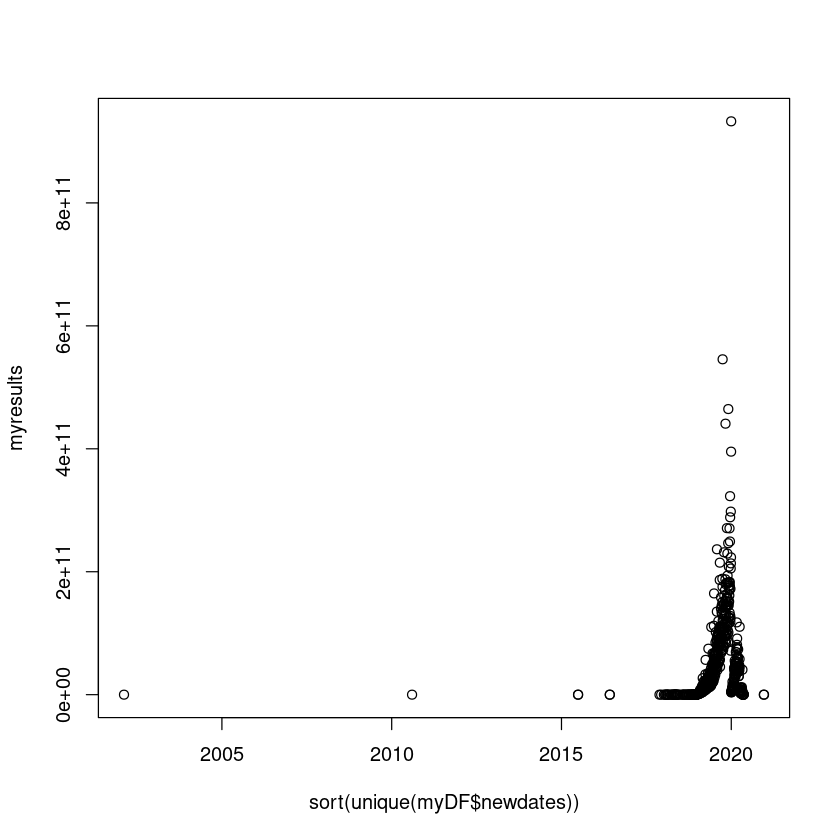

In [11]:
plot(sort(unique(myDF$newdates)), myresults)

## Question 2

In [12]:
newDF <- subset(myDF, (newdates >= mdy("01/01/2019")) & (newdates <= mdy("05/15/2019")))

In [13]:
dim(myDF)
dim(newDF)

[1] 4678762      22

[1] 495435     22

In [14]:
mynewresults <- tapply(newDF$TRANSACTION_DT, newDF$newdates, sum)

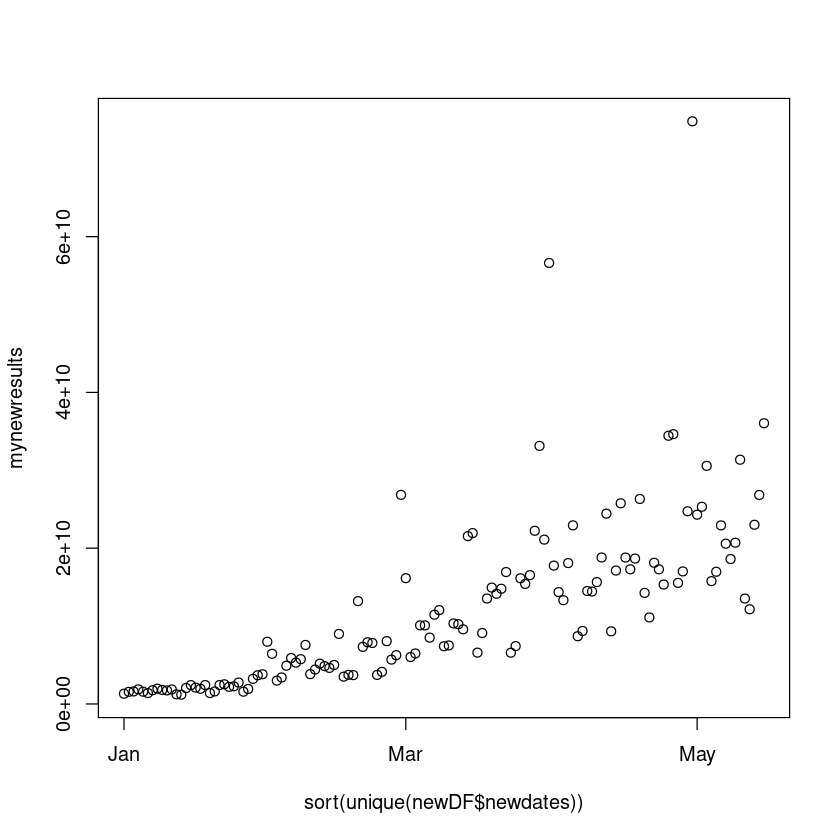

In [15]:
plot(sort(unique(newDF$newdates)), mynewresults)

c. I notice the data has increased variation as the plot progresses closer to May from January. The data is also trending upwards. This matches what we see in the prior plot, as data varies and increases more around 2019 to 2020.

## Question 3

In [16]:
v <- tapply(myDF$TRANSACTION_AMT, myDF$STATE, sum)
sort(v)

SP        NT        UK        PE        SK        YT        MB        NB 
        2         9        25        50        66       162       213       417 
       NS        NL        AB        FM        AS        QC        MH        PW 
      678       909      1474      2250      2908      4347      5000      5000 
       MP        BC        ON        AA        AP        GU        VI        AE 
    10098     12083     17743     32243     49240     78087     86549     87137 
                 PR        ZZ        WV        SD        VT        ID        AK 
   431548    457693    823468   1181879   1212866   1492795   1626126   1627993 
       RI        ND        HI        MS        DE        MT        NE        NH 
  1636246   1665152   1730014   1844410   2120061   2389091   2418525   2970383 
       ME        UT        WY        NM        IA        KS        KY        OK 
  3393310   3517485   3554048   4137547   4291247   4311170   4440149   5402240 
       SC        AR        WI        LA        OR        MO        AL        IN 
  5586743   5690116   5911445   6202190   7088869   7123990   7195054   8906170 
       TN        NV        MN        AZ        CT        NC        MD        OH 
  9043359   9346089   9990430  11750510  12065158  13368140  14940848  15076354 
       MI        NJ        GA        CO        WA        VA        PA        IL 
 15933204  16327791  17026567  18025653  19736146  24995172  25093386  27940911 
       MA        DC        FL        TX        CA        NY 
 32308431  37280905  44118779  63719103 151842431 364883860

In [17]:
myDF$citystatepair <- paste(myDF$CITY, myDF$STATE, sep=',')

In [18]:
head(myDF$citystatepair)

[1] "CAPE CORAL,FL"   "SCOTTSVILLE,NY"  "HARTSDALE,NY"    "WASHINGTON,DC"  
[5] "GRAND RAPIDS,MI" "KISSIMMEE,FL"

In [19]:
w <- tapply(myDF$TRANSACTION_AMT, myDF$citystatepair, sum)

In [20]:
tail(sort(w, decreasing=TRUE), n=50)

LAKE HAMILTON,FL      LINCOLN CITY,,OR         LITTLSTOWN,PA 
                 -500                  -500                  -500 
NORTH READING,  MA,MA             OBRIEN,OR             REGINA,ZZ 
                 -500                  -500                  -500 
               VAB,VA               YORK,MD           CLERMONT,GA 
                 -500                  -500                  -549 
       RIDGE MANOR,FL             ALPINE,AL                GPP,MI 
                 -563                  -646                  -700 
          YORKTOWN,NY            HARFORD,PA           RICHLAND,IN 
                 -706                  -743                  -845 
         BLUEWATER,NM      YORKTOWN HGTS,NY PRAIRIE VILLAGE, K,KS 
                 -869                  -910                  -945 
         BIRCHWOOD,TN MERIDIAN CHARTER T,MI             ARMADA,MI 
                 -955                  -964                  -969 
           FORDYCE,AR        NEW  CASTLE,DE              CERES,NY 
                 -980                  -990                  -995 
                OSLO,             PANAMA,FL           SCOTTOWN,OH 
                -1000                 -1000                 -1000 
     W TOLUCA LAKE,CA       SAINT ALBANS,MO      MOUNTAIN VIEW,HI 
                -1000                 -1128                 -1224 
            EXETER,PA            EASTERO,FL               COOL,CA 
                -1357                 -1500                 -1681 
            CORTEX,FL        SUMPTER TWP,MI       FREEMANSBURG,PA 
                -1800                 -1850                 -2003 
          WELLBORN,FL            CAMERON,TX          WILMINTON,NC 
                -2056                 -2157                 -2300 
            GORDON,TX        LOOKOUT MTN,GA         E. AMHERST,NY 
                -2338                 -2373                 -2700 
              BLVD,OR         BROOKVILLE,KS             DARIEN,NY 
                -2800                 -2800                 -2800 
       GARDEN CITY,NJ             WILSON,AR      PLEASANT HILL,TN 
                -2800                 -2800                 -4295 
             HOXIE,KS             HEFLIN,AL 
                -8150                 -9983

c. In the tail end of the result, I see that there are city state pairs with negative donation amounts. This happened because there are missing values in the city/state dataset.

## Question 4

In [21]:
class(myDF$NAME)

[1] "character"

In [23]:
sum(myDF$TRANSACTION_AMT[grepl(", MARY", myDF$NAME)])

[1] 7111474

a. The type of data is character.

b. 

c. $7,111,474 has been donated in total by people named Mary.

## Question 5

In [27]:
notemployed <- sum(myDF$TRANSACTION_AMT[myDF$EMPLOYER == "NOT EMPLOYED"], na.rm=TRUE)

In [29]:
employed <- sum(myDF$TRANSACTION_AMT[myDF$EMPLOYER == "EMPLOYED"], na.rm=TRUE)

In [31]:
v <- c(employed, notemployed)
names(v) <- c("EMPLOYED", "NOT EMPLOYED")

EMPLOYED NOT EMPLOYED 
       12418     79250204

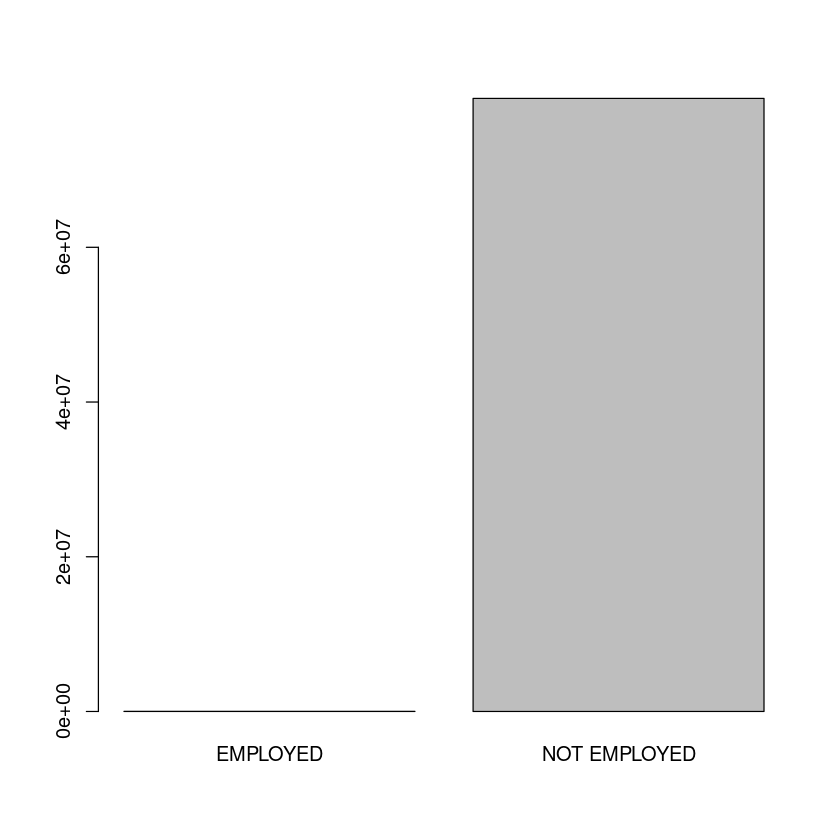

In [33]:
barplot(v)
v

In [38]:
head(sort(tapply(myDF$TRANSACTION_AMT, myDF$OCCUPATION, sum), decreasing=TRUE))

FOUNDER      RETIRED NOT EMPLOYED                  ATTORNEY          CEO 
   279442327     98774206     84855951     77364020     31326953     25055647

In [40]:
ceo <- subset(myDF, myDF$OCCUPATION == "CEO")

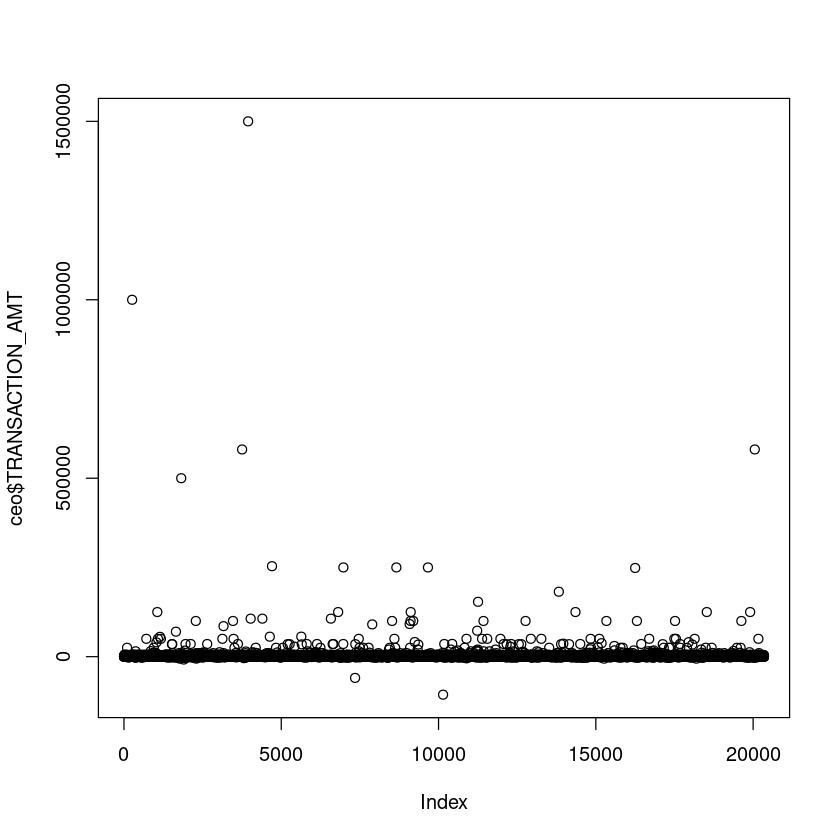

In [41]:
plot(ceo$TRANSACTION_AMT)

b. The category of occupation that donates the most money is 'Founder'.

c. I chose to plot how much money CEOs donated. This is because they may have ulterior motives to donate to certain politicians.

## Pledge

By submitting this work I hereby pledge that this is my own, personal work. I've acknowledged in the designated place at the top of this file all sources that I used to complete said work, including but not limited to: online resources, books, and electronic communications. I've noted all collaboration with fellow students and/or TA's. I did not copy or plagiarize another's work.

> As a Boilermaker pursuing academic excellence, I pledge to be honest and true in all that I do. Accountable together – We are Purdue.